In [49]:
# importing the dataset
from keras.datasets import mnist
import numpy as np
from sklearn.model_selection import train_test_split
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=2/3)

Training set shape: (60000, 28, 28, 1)
Test set shape: (10000, 28, 28, 1)


In [50]:
from keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow
from keras import Sequential
from keras import Model
from keras.layers import Conv2D,Dense,Dropout,Activation,MaxPooling2D,Flatten
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)
y_val = keras.utils.to_categorical(y_val,10)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [53]:
imgd=ImageDataGenerator(rescale=1/255)
imgd.fit(X_train)
imgd1=imgd.flow((X_train,y_train),batch_size=24,seed=30)
model = Sequential()
imgd2=imgd.flow((X_val,y_val),batch_size=10,seed=10)
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=["Accuracy"])
model.fit(imgd1,batch_size=24,epochs=9,validation_data=imgd2,validation_steps=10)

Epoch 1/9
2042/2042 [==============================] - 144s 70ms/step - loss: 0.1651 - Accuracy: 0.9476 - val_loss: 0.0212 - val_Accuracy: 1.0000
Epoch 2/9
2042/2042 [==============================] - 125s 61ms/step - loss: 0.0640 - Accuracy: 0.9805 - val_loss: 0.0241 - val_Accuracy: 1.0000
Epoch 3/9
2042/2042 [==============================] - 125s 61ms/step - loss: 0.0478 - Accuracy: 0.9857 - val_loss: 0.0337 - val_Accuracy: 0.9900
Epoch 4/9
2042/2042 [==============================] - 123s 60ms/step - loss: 0.0405 - Accuracy: 0.9876 - val_loss: 0.0856 - val_Accuracy: 0.9800
Epoch 5/9
2042/2042 [==============================] - 124s 61ms/step - loss: 0.0352 - Accuracy: 0.9890 - val_loss: 0.0111 - val_Accuracy: 0.9900
Epoch 6/9
2042/2042 [==============================] - 124s 61ms/step - loss: 0.0315 - Accuracy: 0.9900 - val_loss: 0.1139 - val_Accuracy: 0.9900
Epoch 7/9
2042/2042 [==============================] - 124s 61ms/step - loss: 0.0288 - Accuracy: 0.9910 - val_loss: 0.0367 -

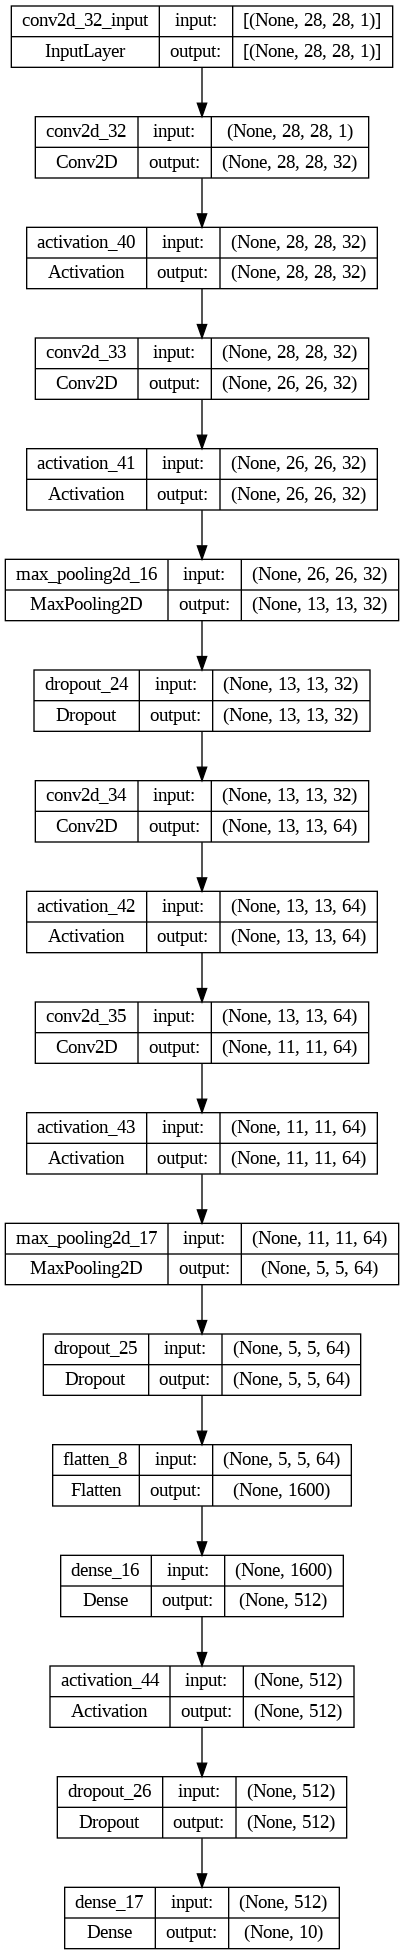

In [54]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

In [58]:
his=model.evaluate(X_test,y_test)


438/438 [==============================] - 9s 19ms/step - loss: 7.3286 - Accuracy: 0.9867
